In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Data Exploration and Cleaning

In [4]:
file_path = "/Users/sapnadavid/Documents/GitHub/BIOS-584/BIOS-584_combined.csv"
df = pd.read_csv(file_path)
#Recode RHQ031
df['RHQ031_clean'] = df['RHQ031'].replace({
    1: 1,
    2: 0,
    7: np.nan,
    9: np.nan
})
#Clean BMI values
df['BMXBMI'] = df['BMXBMI'].mask((df['BMXBMI'] < 10) | (df['BMXBMI'] > 70))
#look for missing values
df[['BMXBMI', 'RHQ031_clean']].isnull().sum()
# BMI descriptive statistics
df['BMXBMI'].describe()
# Menstrual regularity counts
df['RHQ031_clean'].value_counts(dropna=False)

RHQ031_clean
1.0    1552
0.0    1434
NaN     300
Name: count, dtype: int64

Univariate Analysis


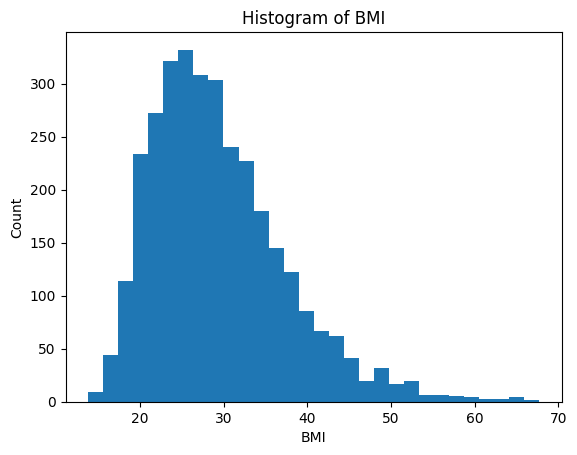

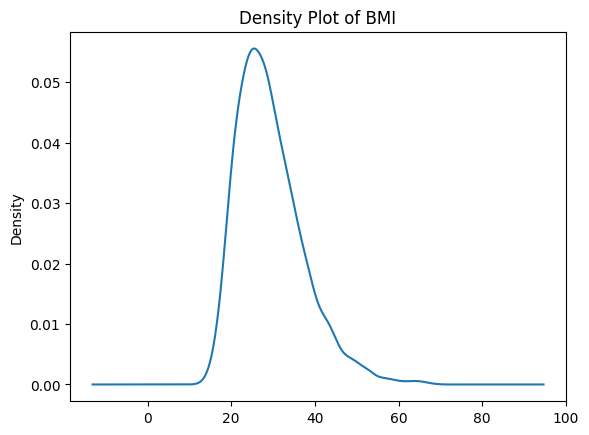

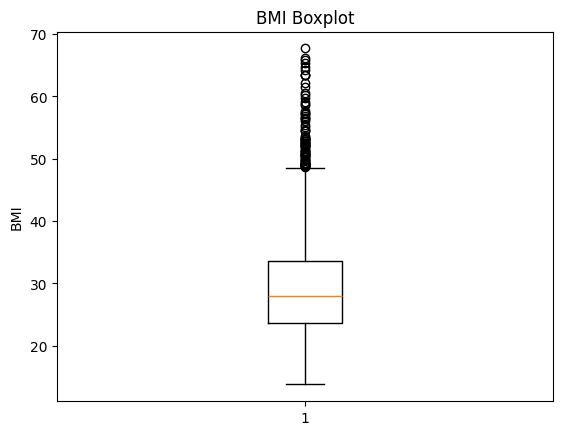

In [6]:
#histogram of BMI
plt.hist(df['BMXBMI'].dropna(), bins=30)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Histogram of BMI')
plt.show()
#density plot
df['BMXBMI'].plot(kind='density')
plt.title('Density Plot of BMI')
plt.show()
# box plot
plt.boxplot(df['BMXBMI'].dropna())
plt.ylabel('BMI')
plt.title('BMI Boxplot')
plt.show()

Bivariate Analysis


In [7]:
#independent t test
regular = df[df['RHQ031_clean'] == 1]['BMXBMI'].dropna()
irregular = df[df['RHQ031_clean'] == 0]['BMXBMI'].dropna()

t_stat, p_value = stats.ttest_ind(regular, irregular, equal_var=False)
t_stat, p_value

#logistic regression
# !pip install statsmodels
import statsmodels.api as sm

df_log = df[['RHQ031_clean', 'BMXBMI']].dropna()

X = sm.add_constant(df_log['BMXBMI'])
y = df_log['RHQ031_clean']

model = sm.Logit(y, X).fit()
print(model.summary())

#convert coefficients to odds ratios
params = model.params
conf = model.conf_int()
OR = np.exp(params)
CI_low = np.exp(conf[0])
CI_high = np.exp(conf[1])

OR_table = pd.DataFrame({
    'OR': OR,
    'CI_low': CI_low,
    'CI_high': CI_high
})
OR_table

Optimization terminated successfully.
         Current function value: 0.687978
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           RHQ031_clean   No. Observations:                 2947
Model:                          Logit   Df Residuals:                     2945
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                0.006288
Time:                        11:07:26   Log-Likelihood:                -2027.5
converged:                       True   LL-Null:                       -2040.3
Covariance Type:            nonrobust   LLR p-value:                 4.072e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7732      0.143      5.421      0.000       0.494       1.053
BMXBMI        -0.0234      0.

,OR,CI_low,CI_high
const,2.166776,1.638353,2.865633
BMXBMI,0.976838,0.967948,0.985809


Seconday Analysis: BMI Categories

In [8]:
df['BMI_cat'] = pd.cut(
    df['BMXBMI'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)
#cross tabulate
pd.crosstab(df['BMI_cat'], df['RHQ031_clean'])
#chi-square test
table = pd.crosstab(df['BMI_cat'], df['RHQ031_clean'])
chi2, p, dof, expected = stats.chi2_contingency(table)
chi2, p


(np.float64(107.7347775043817), np.float64(3.371202148926894e-23))

Tables

In [9]:
#BMI descriptive stats by menstrual regularity
df.groupby('RHQ031_clean')['BMXBMI'].describe()

,count,mean,std,min,25%,50%,75%,max
RHQ031_clean,,,,,,,,
0.0,1414.0,30.319236,7.447428,15.5,25.2,29.1,34.3,67.7
1.0,1533.0,28.823027,8.466458,14.8,22.4,26.9,33.3,66.2


In [10]:
#Counts & percentages by BMI category
pd.crosstab(df['BMI_cat'], df['RHQ031_clean'], normalize='index') * 100

RHQ031_clean,0.0,1.0
BMI_cat,,
Underweight,20.224719,79.775281
Normal,36.518771,63.481229
Overweight,56.354300,43.645700
Obese,53.000000,47.000000


In [11]:
#Logistic regression OR table
OR_table

,OR,CI_low,CI_high
const,2.166776,1.638353,2.865633
BMXBMI,0.976838,0.967948,0.985809


Graphs


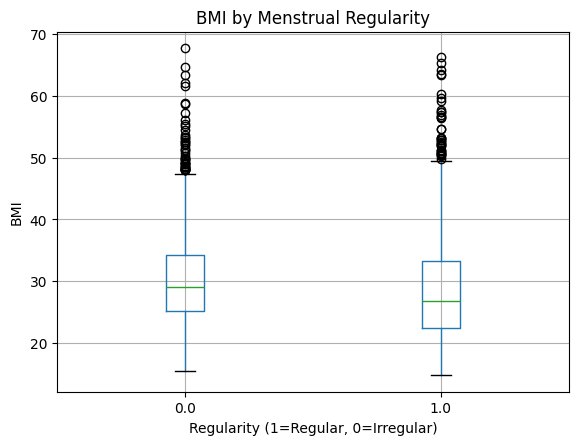

In [12]:
#Boxplot of BMI by menstrual status
df.boxplot(column='BMXBMI', by='RHQ031_clean')
plt.title('BMI by Menstrual Regularity')
plt.suptitle('')
plt.xlabel('Regularity (1=Regular, 0=Irregular)')
plt.ylabel('BMI')
plt.show()

Reporting Missing Data

In [13]:
total_n = len(df)
complete = df[['BMXBMI','RHQ031_clean']].dropna()
excluded_n = total_n - len(complete)

print("Total sample:", total_n)
print("Excluded due to missing BMI or RHQ031:", excluded_n)
print("Percent excluded:", excluded_n/total_n * 100)

Total sample: 3286
Excluded due to missing BMI or RHQ031: 339
Percent excluded: 10.316494217894096
